In [1]:
# Importing dependencies
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

In [2]:
# Reading the cleaned dataset extracted from the database
chd_df = pd.read_csv(Path('ETL/heart_disease_females.csv'))
chd_df.head()

,patient_female_id,age,education,current_smoker,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,tot_chol,sys_bp,dia_bp,bmi,heart_rate,glucose,ten_year_chd
0,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
1,1,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
2,2,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
3,3,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
4,4,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1


# Exploratory Data Analysis

# Data Cleaning

In [3]:
# Getting the number of rows and columns
chd_df.shape

(2034, 16)

In [4]:
# Listing the columns
chd_df.columns

Index(['patient_female_id', 'age', 'education', 'current_smoker',
       'cigs_per_day', 'bp_meds', 'prevalent_stroke', 'prevalent_hyp',
       'diabetes', 'tot_chol', 'sys_bp', 'dia_bp', 'bmi', 'heart_rate',
       'glucose', 'ten_year_chd'],
      dtype='object')

In [5]:
# Check the Datatypes
chd_df.dtypes

patient_female_id      int64
age                    int64
education            float64
current_smoker         int64
cigs_per_day         float64
bp_meds              float64
prevalent_stroke       int64
prevalent_hyp          int64
diabetes               int64
tot_chol             float64
sys_bp               float64
dia_bp               float64
bmi                  float64
heart_rate           float64
glucose              float64
ten_year_chd           int64
dtype: object

In [6]:
#Finding the number of unique values in each column
chd_df.nunique()

patient_female_id    2034
age                    39
education               4
current_smoker          2
cigs_per_day           25
bp_meds                 2
prevalent_stroke        2
prevalent_hyp           2
diabetes                2
tot_chol              223
sys_bp                220
dia_bp                131
bmi                   986
heart_rate             67
glucose               111
ten_year_chd            2
dtype: int64

In [7]:
# Getting the count of values in different columns
print(chd_df["education"].value_counts())
print(chd_df["current_smoker"].value_counts())
print(chd_df["bp_meds"].value_counts())
print(chd_df["prevalent_stroke"].value_counts())
print(chd_df["prevalent_hyp"].value_counts())
print(chd_df["diabetes"].value_counts())
print(chd_df["ten_year_chd"].value_counts())

1.0    815
2.0    650
3.0    397
4.0    172
Name: education, dtype: int64
0    1227
1     807
Name: current_smoker, dtype: int64
0.0    1956
1.0      78
Name: bp_meds, dtype: int64
0    2022
1      12
Name: prevalent_stroke, dtype: int64
0    1401
1     633
Name: prevalent_hyp, dtype: int64
0    1983
1      51
Name: diabetes, dtype: int64
0    1784
1     250
Name: ten_year_chd, dtype: int64


In [8]:
#Finding Duplicates
# Code reference: https://www.geeksforgeeks.org/find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns/
duplicate = chd_df[chd_df.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,patient_female_id,age,education,current_smoker,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,tot_chol,sys_bp,dia_bp,bmi,heart_rate,glucose,ten_year_chd


In [9]:
# Finding Null Values
chd_df.isnull().sum()

patient_female_id    0
age                  0
education            0
current_smoker       0
cigs_per_day         0
bp_meds              0
prevalent_stroke     0
prevalent_hyp        0
diabetes             0
tot_chol             0
sys_bp               0
dia_bp               0
bmi                  0
heart_rate           0
glucose              0
ten_year_chd         0
dtype: int64

In [10]:
# Display Statistical Analysis
chd_df.describe()

,patient_female_id,age,education,current_smoker,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,tot_chol,sys_bp,dia_bp,bmi,heart_rate,glucose,ten_year_chd
count,2034.000000,2034.000000,2034.000000,2034.000000,2034.000000,2034.000000,2034.000000,2034.000000,2034.000000,2034.000000,2034.000000,2034.000000,2034.000000,2034.000000,2034.000000,2034.000000
mean,1016.500000,49.743854,1.963618,0.396755,5.497050,0.038348,0.005900,0.311209,0.025074,239.638151,133.265241,82.360619,25.519651,76.960177,81.791052,0.122911
std,587.309544,8.573273,0.966051,0.489345,8.739338,0.192082,0.076601,0.463102,0.156388,46.168321,23.986809,12.308748,4.516267,12.122018,23.586245,0.328415
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,135.000000,83.500000,51.000000,15.960000,46.000000,40.000000,0.000000
25%,508.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,116.000000,74.000000,22.540000,69.000000,72.000000,0.000000
50%,1016.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,237.000000,128.000000,81.000000,24.720000,75.000000,78.000000,0.000000
75%,1524.750000,56.000000,3.000000,1.000000,10.000000,0.000000,0.000000,1.000000,0.000000,268.000000,146.000000,89.000000,27.710000,85.000000,86.000000,0.000000
max,2033.000000,70.000000,4.000000,1.000000,43.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [11]:
# Dropping unwanted columns
newchd_df =  chd_df.drop(columns = "patient_female_id")
newchd_df.head()

,age,education,current_smoker,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,tot_chol,sys_bp,dia_bp,bmi,heart_rate,glucose,ten_year_chd
0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
1,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
2,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
3,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
4,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1


# Feature Engineering

## Analyzing Distributions

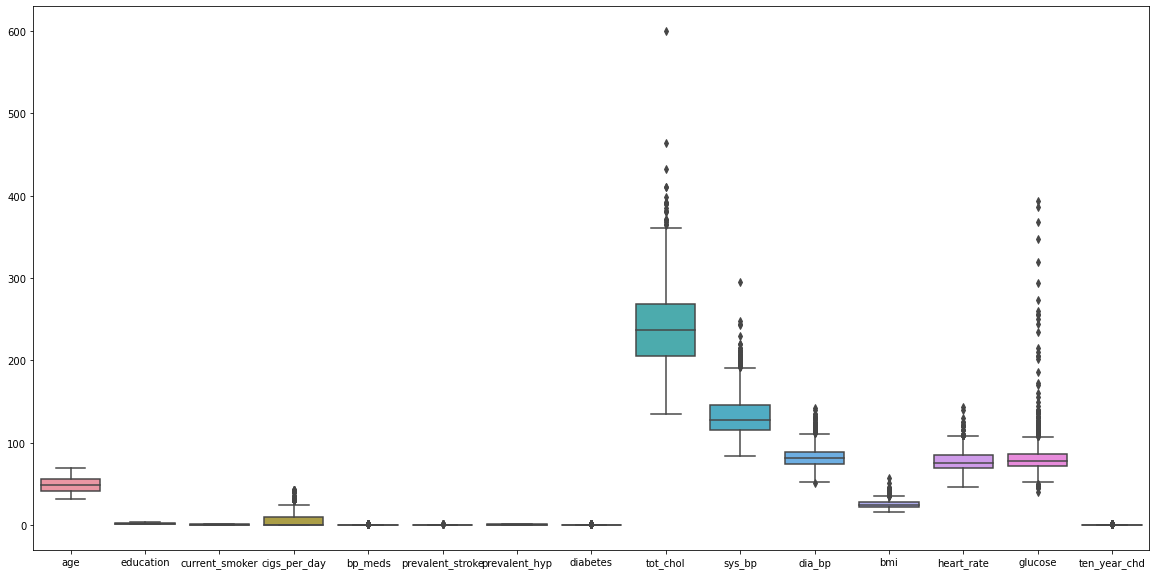

In [12]:
# Displaying a BoxPlot to check for outliers
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=newchd_df)
plt.show()

In [13]:
# Printing outlier in Total Cholestrol 
# Code reference: https://www.geeksforgeeks.org/interquartile-range-to-detect-outliers-in-data/
outlier =[]
for x in newchd_df['tot_chol']:
    if (x> 500):
        outlier.append(x)
print(' outlier in the dataset is', outlier)

 outlier in the dataset is [600.0]


In [14]:
# Printing outlier in Systolic Blood Pressure
outlier =[]
for x in newchd_df['sys_bp']:
    if (x> 250):
        outlier.append(x)
print(' outlier in the dataset is', outlier)

 outlier in the dataset is [295.0]


In [15]:
# Removing extreme outliers- Total Cholestrol
# Code reference: https://stackoverflow.com/questions/43136137/drop-a-specific-row-in-pandas
i = newchd_df[newchd_df["tot_chol"] == 600].index
newchd_df = newchd_df.drop(i)
newchd_df.shape

(2033, 15)

In [16]:
# Removing extreme outliers- Sys BP
j = newchd_df[newchd_df["sys_bp"]==295].index
newchd_df = newchd_df.drop(j)
newchd_df.shape

(2032, 15)

In [17]:
# Display Statistical Analysis
newchd_df.describe()

,age,education,current_smoker,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,tot_chol,sys_bp,dia_bp,bmi,heart_rate,glucose,ten_year_chd
count,2032.000000,2032.000000,2032.000000,2032.000000,2032.000000,2032.000000,2032.000000,2032.000000,2032.000000,2032.000000,2032.000000,2032.000000,2032.000000,2032.000000,2032.000000
mean,49.735728,1.964075,0.397146,5.502461,0.038386,0.005906,0.310531,0.024606,239.454232,133.172736,82.328986,25.511752,76.952264,81.768209,0.122047
std,8.571508,0.966290,0.489427,8.741937,0.192173,0.076639,0.462825,0.154960,45.492327,23.721440,12.256527,4.508422,12.123368,23.561017,0.327421
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,135.000000,83.500000,51.000000,15.960000,46.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,116.000000,74.000000,22.540000,69.000000,72.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,237.000000,128.000000,81.000000,24.710000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,1.000000,10.000000,0.000000,0.000000,1.000000,0.000000,268.000000,146.000000,89.000000,27.695000,85.000000,86.000000,0.000000
max,70.000000,4.000000,1.000000,43.000000,1.000000,1.000000,1.000000,1.000000,464.000000,248.000000,142.500000,56.800000,143.000000,394.000000,1.000000


/Users/njraman/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='education', ylabel='count'>

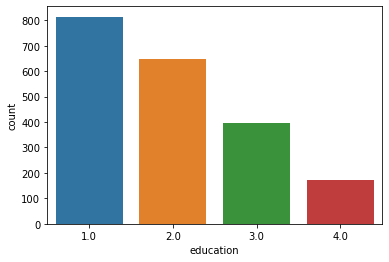

In [18]:
# Plotting data distribution in categorical variables- education
sns.countplot(newchd_df.education)

/Users/njraman/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='current_smoker', ylabel='count'>

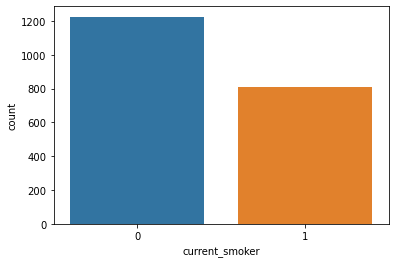

In [19]:
# Plotting data distribution in categorical variables- Current Smoker
sns.countplot(newchd_df.current_smoker)

/Users/njraman/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bp_meds', ylabel='count'>

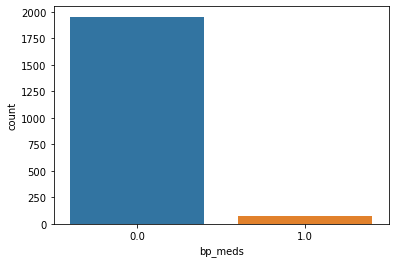

In [20]:
# Plotting data distribution in categorical variables- Bp Meds
sns.countplot(newchd_df.bp_meds)

/Users/njraman/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='prevalent_stroke', ylabel='count'>

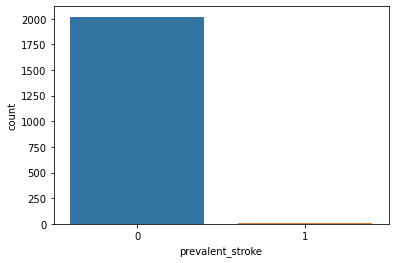

In [21]:
# Plotting data distribution in categorical variables- Prevalent Stroke
sns.countplot(newchd_df.prevalent_stroke)

/Users/njraman/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='prevalent_hyp', ylabel='count'>

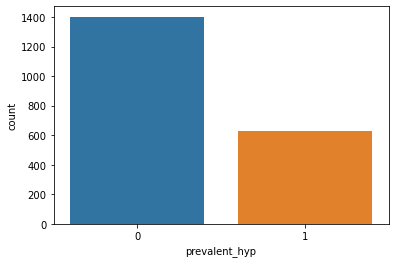

In [22]:
# Plotting data distribution in categorical variables- Prevalent Hypertension
sns.countplot(newchd_df.prevalent_hyp)

/Users/njraman/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='diabetes', ylabel='count'>

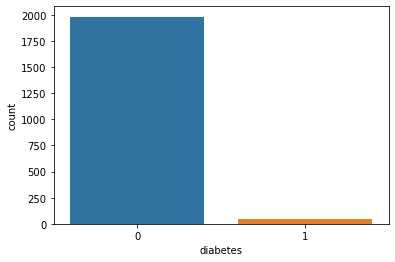

In [23]:
# Plotting data distribution in categorical variables- Diabetes
sns.countplot(newchd_df.diabetes)

/Users/njraman/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='ten_year_chd', ylabel='count'>

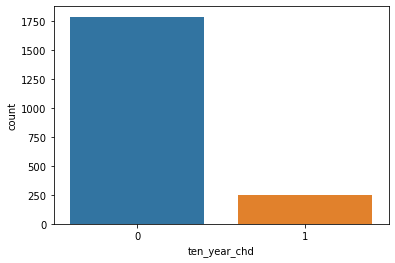

In [24]:
# Plotting data distribution in Target Variable -  Ten year CHD
sns.countplot(newchd_df.ten_year_chd)

/Users/njraman/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cigs_per_day', ylabel='Density'>

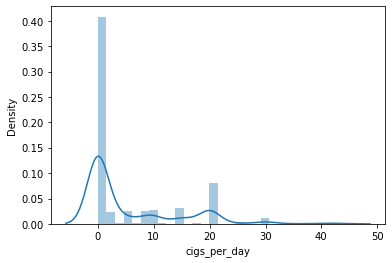

In [25]:
# Plotting data distribution in numerical variables - Ciagarettes per Day
sns.distplot(newchd_df['cigs_per_day'])

/Users/njraman/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tot_chol', ylabel='Density'>

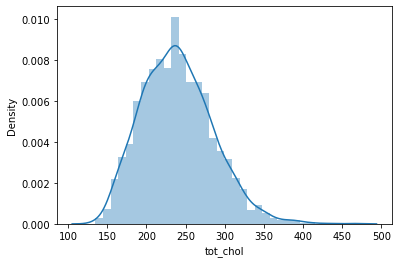

In [26]:
# Plotting data distribution in numerical variables - Total Cholestrol
sns.distplot(newchd_df['tot_chol'])

/Users/njraman/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sys_bp', ylabel='Density'>

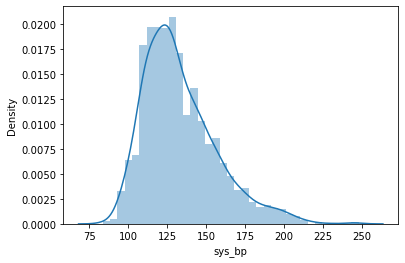

In [27]:
# Plotting data distribution in numerical variables - Systolic Blood pressure
sns.distplot(newchd_df['sys_bp'])

/Users/njraman/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='dia_bp', ylabel='Density'>

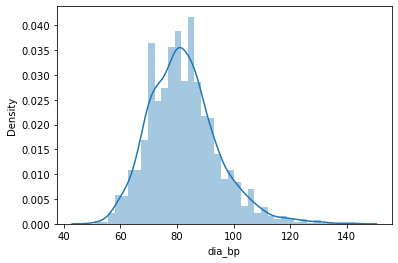

In [28]:
# Plotting data distribution in numerical variables - Diastolic Blood Pressure
sns.distplot(newchd_df['dia_bp'])

/Users/njraman/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

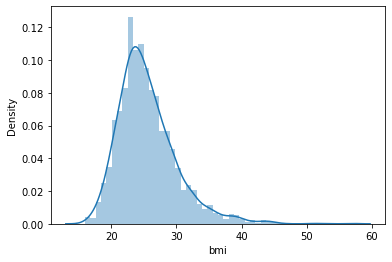

In [29]:
# Plotting data distribution in numerical variables - BMI
sns.distplot(newchd_df['bmi'])

/Users/njraman/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='heart_rate', ylabel='Density'>

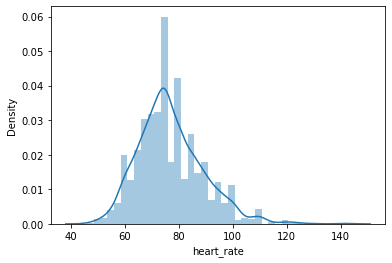

In [30]:
# Plotting data distribution in numerical variables - Heart Rate
sns.distplot(newchd_df['heart_rate'])

/Users/njraman/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='glucose', ylabel='Density'>

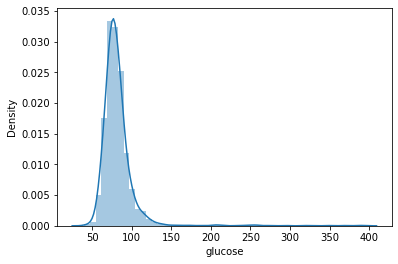

In [31]:
# Plotting data distribution in numerical variables - Glucose
sns.distplot(newchd_df['glucose'])

## Analyzing Relationships

                       age  education  current_smoker  cigs_per_day   bp_meds  \
age               1.000000  -0.167121       -0.265804     -0.235161  0.169665   
education        -0.167121   1.000000        0.098896      0.061008 -0.024388   
current_smoker   -0.265804   0.098896        1.000000      0.775689 -0.036526   
cigs_per_day     -0.235161   0.061008        0.775689      1.000000 -0.027020   
bp_meds           0.169665  -0.024388       -0.036526     -0.027020  1.000000   
prevalent_stroke  0.047348  -0.056972       -0.036305     -0.033827  0.118324   
prevalent_hyp     0.415126  -0.121469       -0.162150     -0.129974  0.297707   
diabetes          0.107209  -0.066435       -0.018550     -0.011312  0.084004   
tot_chol          0.427181  -0.028459       -0.092603     -0.072680  0.124780   
sys_bp            0.480988  -0.152336       -0.175252     -0.131290  0.285684   
dia_bp            0.315356  -0.098403       -0.171997     -0.122044  0.229179   
bmi               0.228835  

Text(0.5, 1.0, 'Correlation among all the Variables of the Dataset')

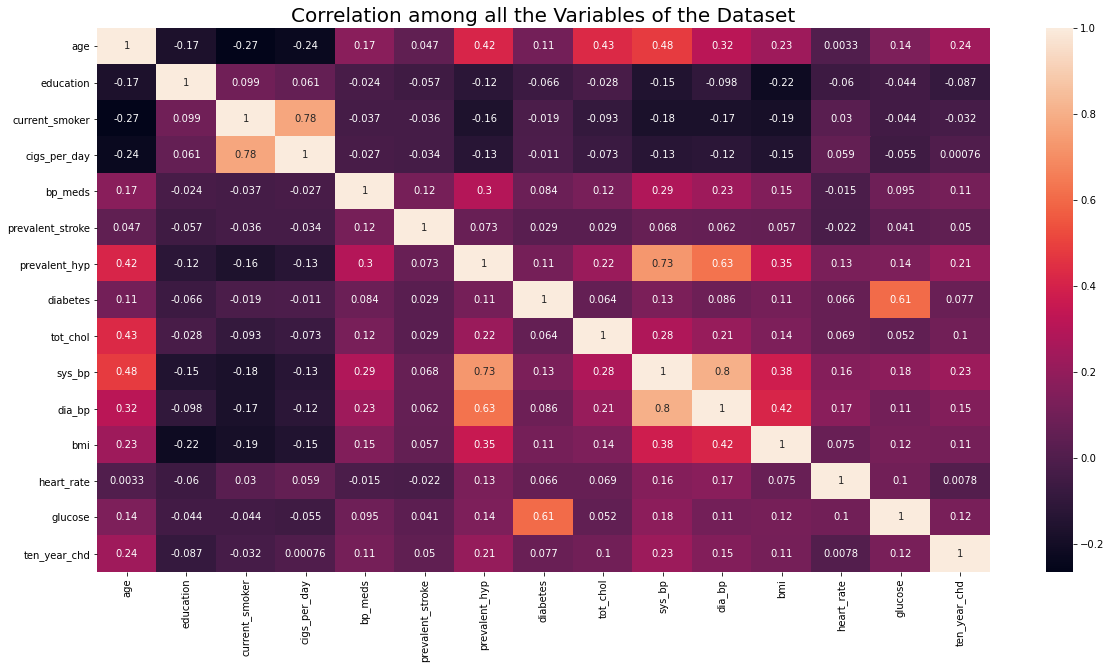

In [32]:
#Checking correlation between the different variables
print (newchd_df.corr())
plt.figure(figsize=(20,10), facecolor='w')
sns.heatmap(newchd_df.corr(),annot=True)
plt.title("Correlation among all the Variables of the Dataset", size=20)

# Feature Selection

In [108]:
# Defining the X and y values
y = newchd_df["ten_year_chd"]
X = newchd_df.drop(columns=["ten_year_chd"])

In [109]:
# Splitting data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
   y,test_size = 0.1, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(1828, 14)
(204, 14)


In [110]:
#Code reference: https://machinelearningmastery.com/feature-selection-with-numerical-input-data/
# Calculating Feature Scores using f Classif
fs = SelectKBest(score_func=f_classif, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

                           0                 1
age               108.141375               age
sys_bp             94.579767            sys_bp
prevalent_hyp      82.184525     prevalent_hyp
dia_bp             44.318883            dia_bp
glucose            34.110045           glucose
bmi                29.113986               bmi
tot_chol           23.235388          tot_chol
bp_meds            19.040390           bp_meds
education          16.312489         education
diabetes           15.519736          diabetes
prevalent_stroke    2.976250  prevalent_stroke
current_smoker      2.456484    current_smoker
cigs_per_day        0.055454      cigs_per_day
heart_rate          0.007801        heart_rate


<AxesSubplot:>

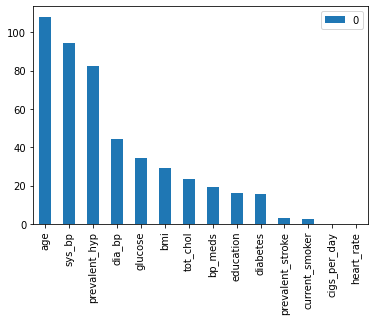

In [111]:
#Printing and Plotting Feature scores
# Code reference: https://stackoverflow.com/questions/41900387/mapping-column-names-to-random-forest-feature-importances
scores = list(zip(fs.scores_,X.columns))
scores.sort(reverse=True)
scores_df = pd.DataFrame(scores, index=[x for (_,x) in scores])
print(scores_df)
scores_df.plot(kind = 'bar')

In [112]:
#Code reference: https://machinelearningmastery.com/feature-selection-with-numerical-input-data/
# Calculating Feature Scores using Mutual Information Feature Selection
fs = SelectKBest(score_func=mutual_info_classif, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

                         0                 1
prevalent_hyp     0.023671     prevalent_hyp
age               0.023445               age
sys_bp            0.018131            sys_bp
education         0.016705         education
bmi               0.011299               bmi
dia_bp            0.006502            dia_bp
glucose           0.006160           glucose
heart_rate        0.003844        heart_rate
current_smoker    0.003815    current_smoker
tot_chol          0.003202          tot_chol
cigs_per_day      0.002452      cigs_per_day
prevalent_stroke  0.000000  prevalent_stroke
diabetes          0.000000          diabetes
bp_meds           0.000000           bp_meds


<AxesSubplot:>

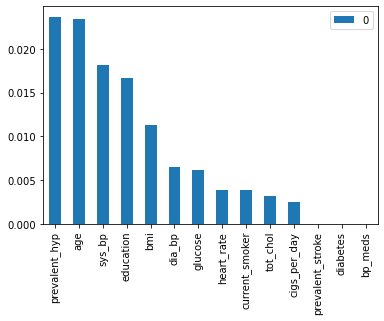

In [113]:
#Printing and Plotting Feature scores
# Code reference: https://stackoverflow.com/questions/41900387/mapping-column-names-to-random-forest-feature-importances
scores = list(zip(fs.scores_,X.columns))
scores.sort(reverse=True)
scores_df = pd.DataFrame(scores, index=[x for (_,x) in scores])
print(scores_df)
scores_df.plot(kind = 'bar')

In [114]:
# Calculating Feature Scores using Mutual Information Feature Selection
fs = SelectKBest(score_func=chi2, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

                           0                 1
sys_bp            381.457295            sys_bp
glucose           243.732720           glucose
tot_chol          198.097415          tot_chol
age               149.788896               age
dia_bp             78.882183            dia_bp
prevalent_hyp      54.482898     prevalent_hyp
bmi                23.041082               bmi
bp_meds            18.152473           bp_meds
diabetes           15.026550          diabetes
education           7.706378         education
prevalent_stroke    2.958388  prevalent_stroke
current_smoker      1.489913    current_smoker
cigs_per_day        0.778975      cigs_per_day
heart_rate          0.015303        heart_rate


<AxesSubplot:>

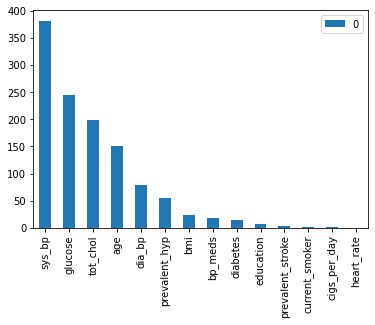

In [115]:
#Printing and Plotting Feature scores
# Code reference: https://stackoverflow.com/questions/41900387/mapping-column-names-to-random-forest-feature-importances
scores = list(zip(fs.scores_,X.columns))
scores.sort(reverse=True)
scores_df = pd.DataFrame(scores, index=[x for (_,x) in scores])
print(scores_df)
scores_df.plot(kind = 'bar')

In [116]:
# Features removed based on EDA and Feature scores
chd_mlm_df = newchd_df.drop(columns = ["prevalent_stroke","heart_rate","education","cigs_per_day","current_smoker"])
chd_mlm_df

,age,bp_meds,prevalent_hyp,diabetes,tot_chol,sys_bp,dia_bp,bmi,glucose,ten_year_chd
0,46,0.0,0,0,250.0,121.0,81.0,28.73,76.0,0
1,61,0.0,1,0,225.0,150.0,95.0,28.58,103.0,1
2,46,0.0,0,0,285.0,130.0,84.0,23.10,85.0,0
3,43,0.0,1,0,228.0,180.0,110.0,30.30,99.0,0
4,63,0.0,0,0,205.0,138.0,71.0,33.11,85.0,1
...,...,...,...,...,...,...,...,...,...,...
2029,59,0.0,0,0,251.0,125.0,80.0,22.18,70.0,0
2030,63,0.0,1,0,266.0,167.0,94.0,25.23,94.0,0
2031,52,0.0,0,0,265.0,137.5,84.5,26.91,86.0,0
2032,50,0.0,1,1,260.0,190.0,130.0,43.67,260.0,0


# Define New X and Y values and Train-Test Split

In [117]:
# Defining the X and y values for MLM
y = chd_mlm_df["ten_year_chd"]
X = chd_mlm_df.drop(columns=["ten_year_chd"])

In [118]:
# Splitting data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
   y, random_state=0, test_size=0.1)
print(X_train.shape)
print(X_test.shape)

(1828, 9)
(204, 9)


# Feature Scaling with Robust Scaler

In [119]:
# Applying the Robust Scaler to scale the data
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Predicting Ten year CHD using Logistic Regression model

In [120]:
# Defining the model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train)
y_pred = classifier.predict(X_test_scaled)

In [121]:
# Displaying the accuracy score,Confusion Matrix, Classification report
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
accuracyScore = accuracy_score(y_test, y_pred)
print("Accuracy Score for Logistic regression:")
print(accuracyScore)
matrix = confusion_matrix(y_test, y_pred)
# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("Confusion Matrix")
print(cm_df)
report = classification_report(y_test, y_pred)
print("Classification report")
print(report)

Accuracy Score for Logistic regression:
0.8774509803921569
Confusion Matrix
          Predicted 0  Predicted 1
Actual 0          178            1
Actual 1           24            1
Classification report
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       179
           1       0.50      0.04      0.07        25

    accuracy                           0.88       204
   macro avg       0.69      0.52      0.50       204
weighted avg       0.83      0.88      0.83       204



# Logistic Regression with Balanced Class weights

In [47]:
# Defining the model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear', random_state=1, class_weight='balanced')
classifier.fit(X_train_scaled, y_train)
y_pred = classifier.predict(X_test_scaled)

In [48]:
# Displaying the accuracy score,Confusion Matrix, Classification report
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
accuracyScore = accuracy_score(y_test, y_pred)
print("Accuracy Score for Logistic regression:")
print(accuracyScore)
matrix = confusion_matrix(y_test, y_pred)
# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("Confusion Matrix")
print(cm_df)
report = classification_report(y_test, y_pred)
print("Classification report")
print(report)

Accuracy Score for Logistic regression:
0.7002457002457002
Confusion Matrix
          Predicted 0  Predicted 1
Actual 0          251          106
Actual 1           16           34
Classification report
              precision    recall  f1-score   support

           0       0.94      0.70      0.80       357
           1       0.24      0.68      0.36        50

    accuracy                           0.70       407
   macro avg       0.59      0.69      0.58       407
weighted avg       0.85      0.70      0.75       407



# Moving Threshold to address imbalanced classification

Best Threshold=0.116918, G-Mean=0.699


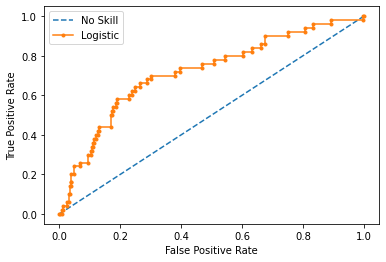

In [49]:
#Code reference: https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/
# Making an roc curve for Logistic Regression Model
from sklearn.metrics import roc_curve
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier.fit(X_train_scaled, y_train)
# predict probabilities
yhat = classifier.predict_proba(X_test_scaled)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [50]:
#Code reference: 
# predict probabilities
ypred = (classifier.predict_proba(X_test_scaled)[:,1]>=0.116918).astype(int)

In [51]:
# Displaying the accuracy score,Confusion Matrix, Classification report
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
accuracyScore = accuracy_score(y_test, ypred)
print("Accuracy Score for Logistic regression:")
print(accuracyScore)
matrix = confusion_matrix(y_test, ypred)
# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("Confusion Matrix")
print(cm_df)
report = classification_report(y_test, ypred)
print("Classification report")
print(report)

Accuracy Score for Logistic regression:
0.6953316953316954
Confusion Matrix
          Predicted 0  Predicted 1
Actual 0          249          108
Actual 1           16           34
Classification report
              precision    recall  f1-score   support

           0       0.94      0.70      0.80       357
           1       0.24      0.68      0.35        50

    accuracy                           0.70       407
   macro avg       0.59      0.69      0.58       407
weighted avg       0.85      0.70      0.75       407



# Support Vector Model

In [52]:
# Defining the model
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [53]:
# Displaying the accuracy score,Confusion Matrix, Classification report
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
accuracyScore = accuracy_score(y_test, y_pred)
print("Accuracy Score for Support Vector Model:")
print(accuracyScore)
matrix = confusion_matrix(y_test, y_pred)
# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("Confusion Matrix")
print(cm_df)
report = classification_report(y_test, y_pred)
print("Classification report")
print(report)

Accuracy Score for Support Vector Model:
0.8771498771498771
Confusion Matrix
          Predicted 0  Predicted 1
Actual 0          357            0
Actual 1           50            0
Classification report
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       357
           1       0.00      0.00      0.00        50

    accuracy                           0.88       407
   macro avg       0.44      0.50      0.47       407
weighted avg       0.77      0.88      0.82       407



/Users/njraman/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/njraman/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/njraman/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

# Decision Tree Model

In [54]:
from sklearn.tree import DecisionTreeClassifier
# Creating the decision tree classifier instance.
model = DecisionTreeClassifier()
# Fitting the model.
model = model.fit(X_train_scaled, y_train)
#Predicting y values
y_pred = model.predict(X_test_scaled)

In [55]:
# Displaying the accuracy score,Confusion Matrix, Classification report
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
accuracyScore = accuracy_score(y_test, y_pred)
print("Accuracy Score for Decision Tree Model:")
print(accuracyScore)
matrix = confusion_matrix(y_test, y_pred)
# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("Confusion Matrix")
print(cm_df)
report = classification_report(y_test, y_pred)
print("Classification report")
print(report)

Accuracy Score for Decision Tree Model:
0.7886977886977887
Confusion Matrix
          Predicted 0  Predicted 1
Actual 0          314           43
Actual 1           43            7
Classification report
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       357
           1       0.14      0.14      0.14        50

    accuracy                           0.79       407
   macro avg       0.51      0.51      0.51       407
weighted avg       0.79      0.79      0.79       407



# Decision Tree Model with balanced Class Weight

In [56]:
from sklearn.tree import DecisionTreeClassifier
# Creating the decision tree classifier instance.
model = DecisionTreeClassifier(class_weight="balanced")
# Fitting the model.
model = model.fit(X_train_scaled, y_train)
#Predicting y values
y_pred = model.predict(X_test_scaled)

In [57]:
# Displaying the accuracy score,Confusion Matrix, Classification report
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
accuracyScore = accuracy_score(y_test, y_pred)
print("Accuracy Score for Decision Tree Model:")
print(accuracyScore)
matrix = confusion_matrix(y_test, y_pred)
# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("Confusion Matrix")
print(cm_df)
report = classification_report(y_test, y_pred)
print("Classification report")
print(report)

Accuracy Score for Decision Tree Model:
0.8034398034398035
Confusion Matrix
          Predicted 0  Predicted 1
Actual 0          320           37
Actual 1           43            7
Classification report
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       357
           1       0.16      0.14      0.15        50

    accuracy                           0.80       407
   macro avg       0.52      0.52      0.52       407
weighted avg       0.79      0.80      0.80       407



# Random Forest method

In [58]:
from sklearn.ensemble import RandomForestClassifier
# Creating the decision tree classifier instance.
model = RandomForestClassifier(n_estimators=128, random_state=78) 
# Fitting the model.
model = model.fit(X_train_scaled, y_train)
#Predicting y values
y_pred = model.predict(X_test_scaled)

In [59]:
# Displaying the accuracy score,Confusion Matrix, Classification report
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
accuracyScore = accuracy_score(y_test, y_pred)
print("Accuracy Score for Random Forest Model:")
print(accuracyScore)
matrix = confusion_matrix(y_test, y_pred)
# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("Confusion Matrix")
print(cm_df)
report = classification_report(y_test, y_pred)
print("Classification report")
print(report)

Accuracy Score for Random Forest Model:
0.85995085995086
Confusion Matrix
          Predicted 0  Predicted 1
Actual 0          349            8
Actual 1           49            1
Classification report
              precision    recall  f1-score   support

           0       0.88      0.98      0.92       357
           1       0.11      0.02      0.03        50

    accuracy                           0.86       407
   macro avg       0.49      0.50      0.48       407
weighted avg       0.78      0.86      0.82       407



# Gradient Boosting Model

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(n_estimators=20,
   learning_rate=0.5, max_features=5, max_depth=3, random_state=0)

classifier.fit(X_train_scaled, y_train)
y_pred = classifier.predict(X_test_scaled)

In [61]:
# Displaying the accuracy score,Confusion Matrix, Classification report
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
accuracyScore = accuracy_score(y_test, y_pred)
print("Accuracy Score for Gradient Boosting Model:")
print(accuracyScore)
matrix = confusion_matrix(y_test, y_pred)
# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("Confusion Matrix")
print(cm_df)
report = classification_report(y_test, y_pred)
print("Classification report")
print(report)

Accuracy Score for Gradient Boosting Model:
0.8378378378378378
Confusion Matrix
          Predicted 0  Predicted 1
Actual 0          337           20
Actual 1           46            4
Classification report
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       357
           1       0.17      0.08      0.11        50

    accuracy                           0.84       407
   macro avg       0.52      0.51      0.51       407
weighted avg       0.79      0.84      0.81       407



# Resampling - Oversampling

In [105]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train_scaled, y_train)


# Logistic Regression

In [122]:
classifier = LogisticRegression()
classifier.fit(X_resampled, y_resampled)
y_pred = classifier.predict(X_test_scaled)

In [107]:
# Displaying the accuracy score,Confusion Matrix, Classification report
from sklearn.metrics import balanced_accuracy_score,confusion_matrix
from imblearn.metrics import classification_report_imbalanced
accuracyScore = balanced_accuracy_score(y_test, y_pred)
print("Accuracy Score for Logistic regression:")
print(accuracyScore)
matrix = confusion_matrix(y_test, y_pred)
# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("Confusion Matrix")
print(cm_df)
report = classification_report_imbalanced(y_test, y_pred)
print("Classification report")
print(report)

Accuracy Score for Logistic regression:
0.6483317595215612
Confusion Matrix
          Predicted 0  Predicted 1
Actual 0          242          111
Actual 1           21           33
Classification report
                   pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.69      0.61      0.79      0.65      0.42       353
          1       0.23      0.61      0.69      0.33      0.65      0.42        54

avg / total       0.83      0.68      0.62      0.73      0.65      0.42       407



# Decision Tree Model

In [65]:
from sklearn.tree import DecisionTreeClassifier
# Creating the decision tree classifier instance.
model = DecisionTreeClassifier()
# Fitting the model.
model = model.fit(X_resampled, y_resampled)
#Predicting y values
y_pred = model.predict(X_test_scaled)

In [66]:
# Displaying the accuracy score,Confusion Matrix, Classification report
from sklearn.metrics import balanced_accuracy_score,confusion_matrix
from imblearn.metrics import classification_report_imbalanced
accuracyScore = balanced_accuracy_score(y_test, y_pred)
print("Accuracy Score for Logistic regression:")
print(accuracyScore)
matrix = confusion_matrix(y_test, y_pred)
# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("Confusion Matrix")
print(cm_df)
report = classification_report_imbalanced(y_test, y_pred)
print("Classification report")
print(report)

Accuracy Score for Logistic regression:
0.598375350140056
Confusion Matrix
          Predicted 0  Predicted 1
Actual 0          313           44
Actual 1           34           16
Classification report
                   pre       rec       spe        f1       geo       iba       sup

          0       0.90      0.88      0.32      0.89      0.53      0.30       357
          1       0.27      0.32      0.88      0.29      0.53      0.26        50

avg / total       0.82      0.81      0.39      0.82      0.53      0.29       407



# Random Forest method

In [67]:
from sklearn.ensemble import RandomForestClassifier
# Creating the decision tree classifier instance.
model = RandomForestClassifier(n_estimators=128, random_state=78) 
# Fitting the model.
model = model.fit(X_resampled, y_resampled)
#Predicting y values
y_pred = model.predict(X_test_scaled)

In [68]:
# Displaying the accuracy score,Confusion Matrix, Classification report
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
accuracyScore = accuracy_score(y_test, y_pred)
print("Accuracy Score for Random Forest Model:")
print(accuracyScore)
matrix = confusion_matrix(y_test, y_pred)
# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("Confusion Matrix")
print(cm_df)
report = classification_report(y_test, y_pred)
print("Classification report")
print(report)

Accuracy Score for Random Forest Model:
0.8525798525798526
Confusion Matrix
          Predicted 0  Predicted 1
Actual 0          344           13
Actual 1           47            3
Classification report
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       357
           1       0.19      0.06      0.09        50

    accuracy                           0.85       407
   macro avg       0.53      0.51      0.51       407
weighted avg       0.79      0.85      0.82       407



# Gradient Boosting Method

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(n_estimators=20,
   learning_rate=0.5, max_features=5, max_depth=3, random_state=0)

classifier.fit(X_resampled, y_resampled)
y_pred = classifier.predict(X_test_scaled)

In [70]:
# Displaying the accuracy score,Confusion Matrix, Classification report
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
accuracyScore = accuracy_score(y_test, y_pred)
print("Accuracy Score for Gradient Boosting Model:")
print(accuracyScore)
matrix = confusion_matrix(y_test, y_pred)
# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("Confusion Matrix")
print(cm_df)
report = classification_report(y_test, y_pred)
print("Classification report")
print(report)

Accuracy Score for Gradient Boosting Model:
0.7223587223587223
Confusion Matrix
          Predicted 0  Predicted 1
Actual 0          277           80
Actual 1           33           17
Classification report
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       357
           1       0.18      0.34      0.23        50

    accuracy                           0.72       407
   macro avg       0.53      0.56      0.53       407
weighted avg       0.81      0.72      0.76       407



# Resampling - Undersampling

In [123]:
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train_scaled, y_train)

# Logistic Regression

In [124]:
classifier = LogisticRegression()
classifier.fit(X_resampled, y_resampled)
y_pred = classifier.predict(X_test_scaled)

In [125]:
# Displaying the accuracy score,Confusion Matrix, Classification report
from sklearn.metrics import balanced_accuracy_score,confusion_matrix
from imblearn.metrics import classification_report_imbalanced
accuracyScore = balanced_accuracy_score(y_test, y_pred)
print("Accuracy Score for Logistic regression:")
print(accuracyScore)
matrix = confusion_matrix(y_test, y_pred)
# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("Confusion Matrix")
print(cm_df)
report = classification_report_imbalanced(y_test, y_pred)
print("Classification report")
print(report)

Accuracy Score for Logistic regression:
0.6524022346368715
Confusion Matrix
          Predicted 0  Predicted 1
Actual 0          119           60
Actual 1            9           16
Classification report
                   pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.66      0.64      0.78      0.65      0.43       179
          1       0.21      0.64      0.66      0.32      0.65      0.42        25

avg / total       0.84      0.66      0.64      0.72      0.65      0.43       204



# Decision Tree Model

In [76]:
from sklearn.tree import DecisionTreeClassifier
# Creating the decision tree classifier instance.
model = DecisionTreeClassifier()
# Fitting the model.
model = model.fit(X_resampled, y_resampled)
#Predicting y values
y_pred = model.predict(X_test_scaled)

In [77]:
# Displaying the accuracy score,Confusion Matrix, Classification report
from sklearn.metrics import balanced_accuracy_score,confusion_matrix
from imblearn.metrics import classification_report_imbalanced
accuracyScore = balanced_accuracy_score(y_test, y_pred)
print("Accuracy Score for Logistic regression:")
print(accuracyScore)
matrix = confusion_matrix(y_test, y_pred)
# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("Confusion Matrix")
print(cm_df)
report = classification_report_imbalanced(y_test, y_pred)
print("Classification report")
print(report)

Accuracy Score for Logistic regression:
0.5108963585434174
Confusion Matrix
          Predicted 0  Predicted 1
Actual 0          172          185
Actual 1           23           27
Classification report
                   pre       rec       spe        f1       geo       iba       sup

          0       0.88      0.48      0.54      0.62      0.51      0.26       357
          1       0.13      0.54      0.48      0.21      0.51      0.26        50

avg / total       0.79      0.49      0.53      0.57      0.51      0.26       407



# Random Forest Method

In [78]:
from sklearn.ensemble import RandomForestClassifier
# Creating the decision tree classifier instance.
model = RandomForestClassifier(n_estimators=128, random_state=78) 
# Fitting the model.
model = model.fit(X_resampled, y_resampled)
#Predicting y values
y_pred = model.predict(X_test_scaled)

In [79]:
# Displaying the accuracy score,Confusion Matrix, Classification report
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
accuracyScore = accuracy_score(y_test, y_pred)
print("Accuracy Score for Random Forest Model:")
print(accuracyScore)
matrix = confusion_matrix(y_test, y_pred)
# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("Confusion Matrix")
print(cm_df)
report = classification_report(y_test, y_pred)
print("Classification report")
print(report)

Accuracy Score for Random Forest Model:
0.6412776412776413
Confusion Matrix
          Predicted 0  Predicted 1
Actual 0          230          127
Actual 1           19           31
Classification report
              precision    recall  f1-score   support

           0       0.92      0.64      0.76       357
           1       0.20      0.62      0.30        50

    accuracy                           0.64       407
   macro avg       0.56      0.63      0.53       407
weighted avg       0.83      0.64      0.70       407



# Gradient Boosting Method

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(n_estimators=20,
   learning_rate=0.5, max_features=5, max_depth=3, random_state=0)

classifier.fit(X_resampled, y_resampled)
y_pred = classifier.predict(X_test_scaled)

In [81]:
# Displaying the accuracy score,Confusion Matrix, Classification report
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
accuracyScore = accuracy_score(y_test, y_pred)
print("Accuracy Score for Gradient Boosting Model:")
print(accuracyScore)
matrix = confusion_matrix(y_test, y_pred)
# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("Confusion Matrix")
print(cm_df)
report = classification_report(y_test, y_pred)
print("Classification report")
print(report)

Accuracy Score for Gradient Boosting Model:
0.597051597051597
Confusion Matrix
          Predicted 0  Predicted 1
Actual 0          214          143
Actual 1           21           29
Classification report
              precision    recall  f1-score   support

           0       0.91      0.60      0.72       357
           1       0.17      0.58      0.26        50

    accuracy                           0.60       407
   macro avg       0.54      0.59      0.49       407
weighted avg       0.82      0.60      0.67       407



# Combination Sampling

In [82]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [83]:
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier.fit(X_resampled, y_resampled)
y_pred = classifier.predict(X_test_scaled)

/Users/njraman/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
